In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Q1

## 1

## 2

## 3

In [2]:
data = [(0., 0.),
        (1., 0.5),
        (2., 1.),
        (3., 2.),
        (4., 1.),
        (6., 1.5),
        (8., 0.5)]

In [3]:
y = np.array(data)[:,1]
x = np.array(data)[:,0]

In [4]:
def compute_loss(tau):
    # TODO
    loss = 0
    for n in range(len(data)):
        sigma_i = 0
        for i in range(len(data)):
            if i != n:
                d = np.matmul(np.matrix(np.transpose(x[i] - x[n])), np.matrix(x[i] - x[n]))
                sigma_i += np.exp(-d/tau) * y[i]
        loss += (y[n] - sigma_i) ** 2
    return loss.item()

In [5]:
print(f'{compute_loss(0.01):.4f}')
print(f'{compute_loss(2):.4f}')
print(f'{compute_loss(100):.4f}')

8.7500
3.3050
120.3592


## 4

In [6]:
def Kernel(x_train, x_new, tau):
    sigma_i = 0
    for i in range(len(x_train)):
        d = np.matmul(np.matrix(np.transpose(x[i] - x_new)), np.matrix(x[i] - x_new))
        sigma_i += (np.exp(-d/tau) * y[i]) * 1.0
    return sigma_i.item()

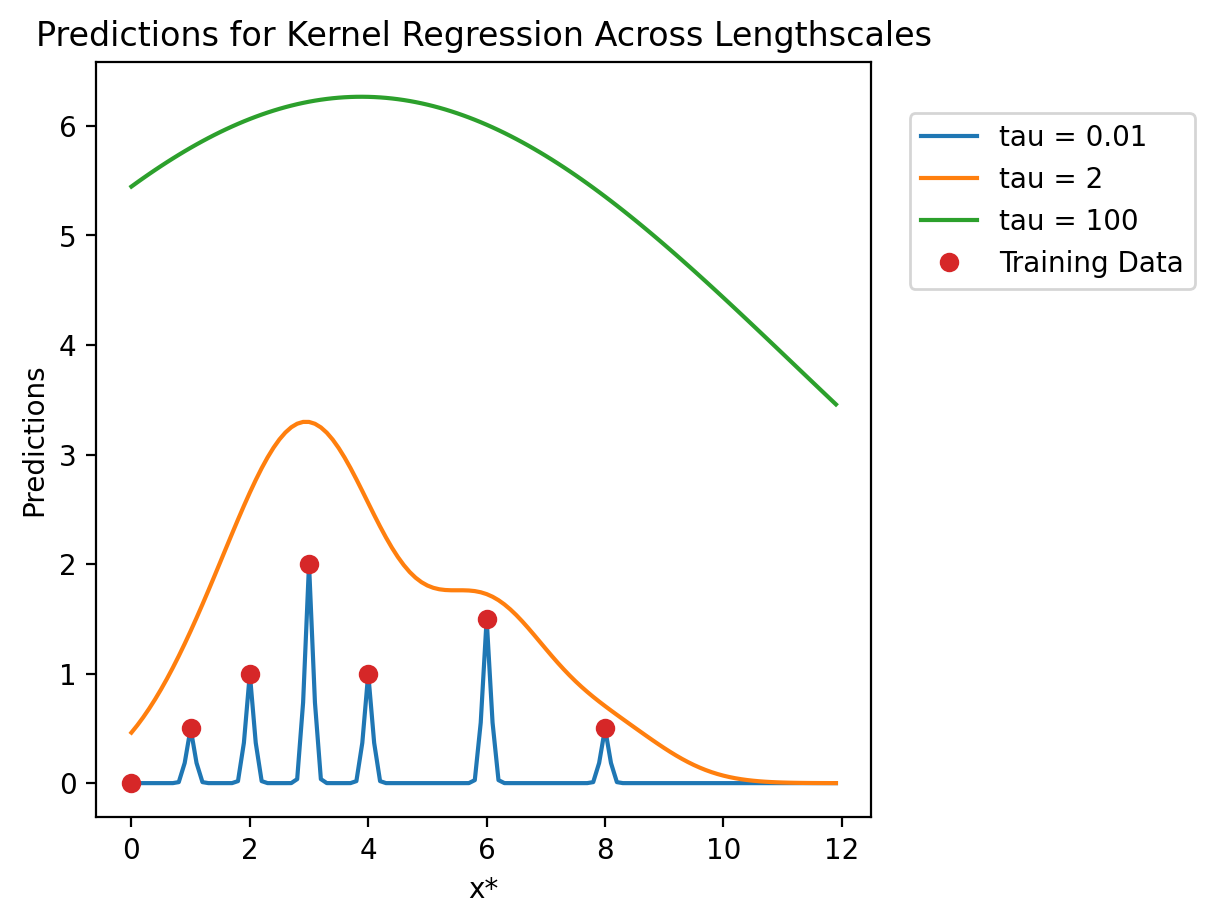

In [7]:
plt.figure(figsize=(5, 5), dpi=200)
x_new = np.arange(0,12,0.1)
predictions = [[],[],[]]
taus = [0.01,2,100]
for i in range(len(taus)):
    for x_n in x_new:
        predictions[i].append(Kernel(x, x_n, taus[i]))
    plt.plot(x_new, predictions[i], label = "tau = %s" % taus[i])
plt.plot(x, y, 'o', label = 'Training Data')
plt.xlabel('x*')
plt.ylabel('Predictions')
plt.title('Predictions for Kernel Regression Across Lengthscales')
plt.legend(loc = (1.05,0.7))

When the lengthscale is as small as 0.01, predictions turn to be shrinked to zero unless the test x is very close to the training data we have. On the other extreme, when tau is as big as 100, predictions tend to be more similar across different x's because the influence of distance between the test point and all the other training points is weakened by a large denomiantor. Therefore, tau = 2 is the best among our choices which is consistent with our loss computation above.

# Q2

## 1

In [8]:
data = [(0., 0.),
        (1., 0.5),
        (2., 1),
        (3., 2),
        (4., 1),
        (6., 1.5),
        (8., 0.5)]

x_train = np.array([d[0] for d in data])
y_train = np.array([d[1] for d in data])

x_test = np.arange(0, 12, .1)

print("y is:")
print(y_train)



y is:
[0.  0.5 1.  2.  1.  1.5 0.5]


In [9]:
def predict_knn(k=1, tau=1):
    """Returns predictions for the values in x_test, using KNN predictor with the specified k."""
    # TODO: your code here
    predictions = []
    for i in range(len(x_test)):
        distance = []
        for j in range(len(x_train)):
            s = np.matmul(np.matrix(np.transpose(x_train[j] - x_test[i])), np.matrix(x_train[j] - x_test[i]))
            d = np.exp(-s/tau)
            d = d.item()
            distance.append(d)
        index = np.argsort(distance)[::-1][:k]
        predictions.append(np.mean([y_train[i] for i in index]))
        
    return predictions

## 2

As k increases from 1 to 3 to 6, KNN predictions give more and more similar results across different x's, which resembles the three plots from Problem 1, where as tau goes from 0.01 to 2 to 100, the predictions are more and more similar, which is because the model is less and less flexible as k or tau increases and bias increases as variance decreases.

kNN and kernel- based regressors interpolate similarly since k and $\tau$ control flexibility. However, they do not extrapolate similarly. For kNN, extrapolations outside of the range of training data give the same result on predicting on marginal data. While for kernel- based regressors, distance from the range matters since as the distance go larger, weight of all the training data go to zero.

I don't think there exist some values of k and $\tau$ for which the kNN and kernel- based regressors produce the exact same classifier. kNN uses a discrete distance weight while kernel- based regressors uses a continuous distance weight, as can be shown from the two sets of plots above where predictions of kNNs are bumpy intervals while kernel- based regressors are continuous curves.

## 3

We do not change $\tau$ because here we need to find a way to quantify distance so as to determine nearest neighbours. By changing $\tau$, we are playing with different quantification but they result in the same ranking and therefore the same nearest neighbours.

# Q4

## 1

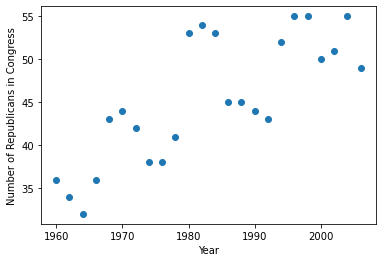

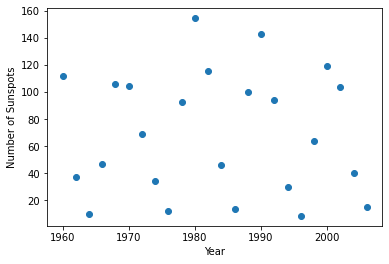

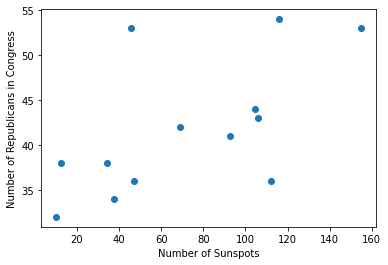

In [10]:
csv_filename = 'data/year-sunspots-republicans.csv'
years  = []
republican_counts = []
sunspot_counts = []

with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        years.append(float(row[0]))
        sunspot_counts.append(float(row[1]))
        republican_counts.append(float(row[2]))

# Turn the data into numpy arrays.
years  = np.array(years)
republican_counts = np.array(republican_counts)
sunspot_counts = np.array(sunspot_counts)
last_year = 1985

# Plot the data.
plt.figure(1)
plt.plot(years, republican_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.figure(2)
plt.plot(years, sunspot_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.figure(3)
plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o')
plt.xlabel("Number of Sunspots")
plt.ylabel("Number of Republicans in Congress")
plt.show()

# Create the simplest basis, with just the time and an offset.
X = np.vstack((np.ones(years.shape), years)).T

In [11]:
# TODO: basis functions
# Based on the letter input for part ('a','b','c','d'), output numpy arrays for the bases.
# The shape of arrays you return should be: (a) 24x6, (b) 24x12, (c) 24x6, (c) 24x26
# xx is the input of years (or any variable you want to turn into the appropriate basis).
# is_years is a Boolean variable which indicates whether or not the input variable is
# years; if so, is_years should be True, and if the input varible is sunspots, is_years
# should be false
def make_basis(xx,part='a',is_years=True):
#DO NOT CHANGE LINES 65-69
    if part == 'a' and is_years:
        xx = (xx - np.array([1960]*len(xx)))/40
        
    if part == "a" and not is_years:
        xx = xx/20
    
    m = len(xx) #first dimension of the output array
    
    if part == 'a':
        ret = np.ones((m,6))
        for i in range(1,6):
            ret[:,i] = xx**i
    
    if part == 'b':
        ret = np.ones((m,12))
        mus = [x for x in range(1960,2011,5)]
        for i in range(len(mus)):
            ret[:,i] = np.exp(-(xx - mus[i]) ** 2 / 25)
            
    if part == 'c':
        ret = np.ones((m,6))
        for i in range(1,6):
            ret[:,i] = np.cos(xx/i)
            
    if part == 'd':
        ret = np.ones((m,26))
        for i in range(1,26):
            ret[:,i] = np.cos(xx/i)
        
        
    return ret

# Nothing fancy for outputs.
Y = republican_counts

# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,Y):
    w = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))
    return w

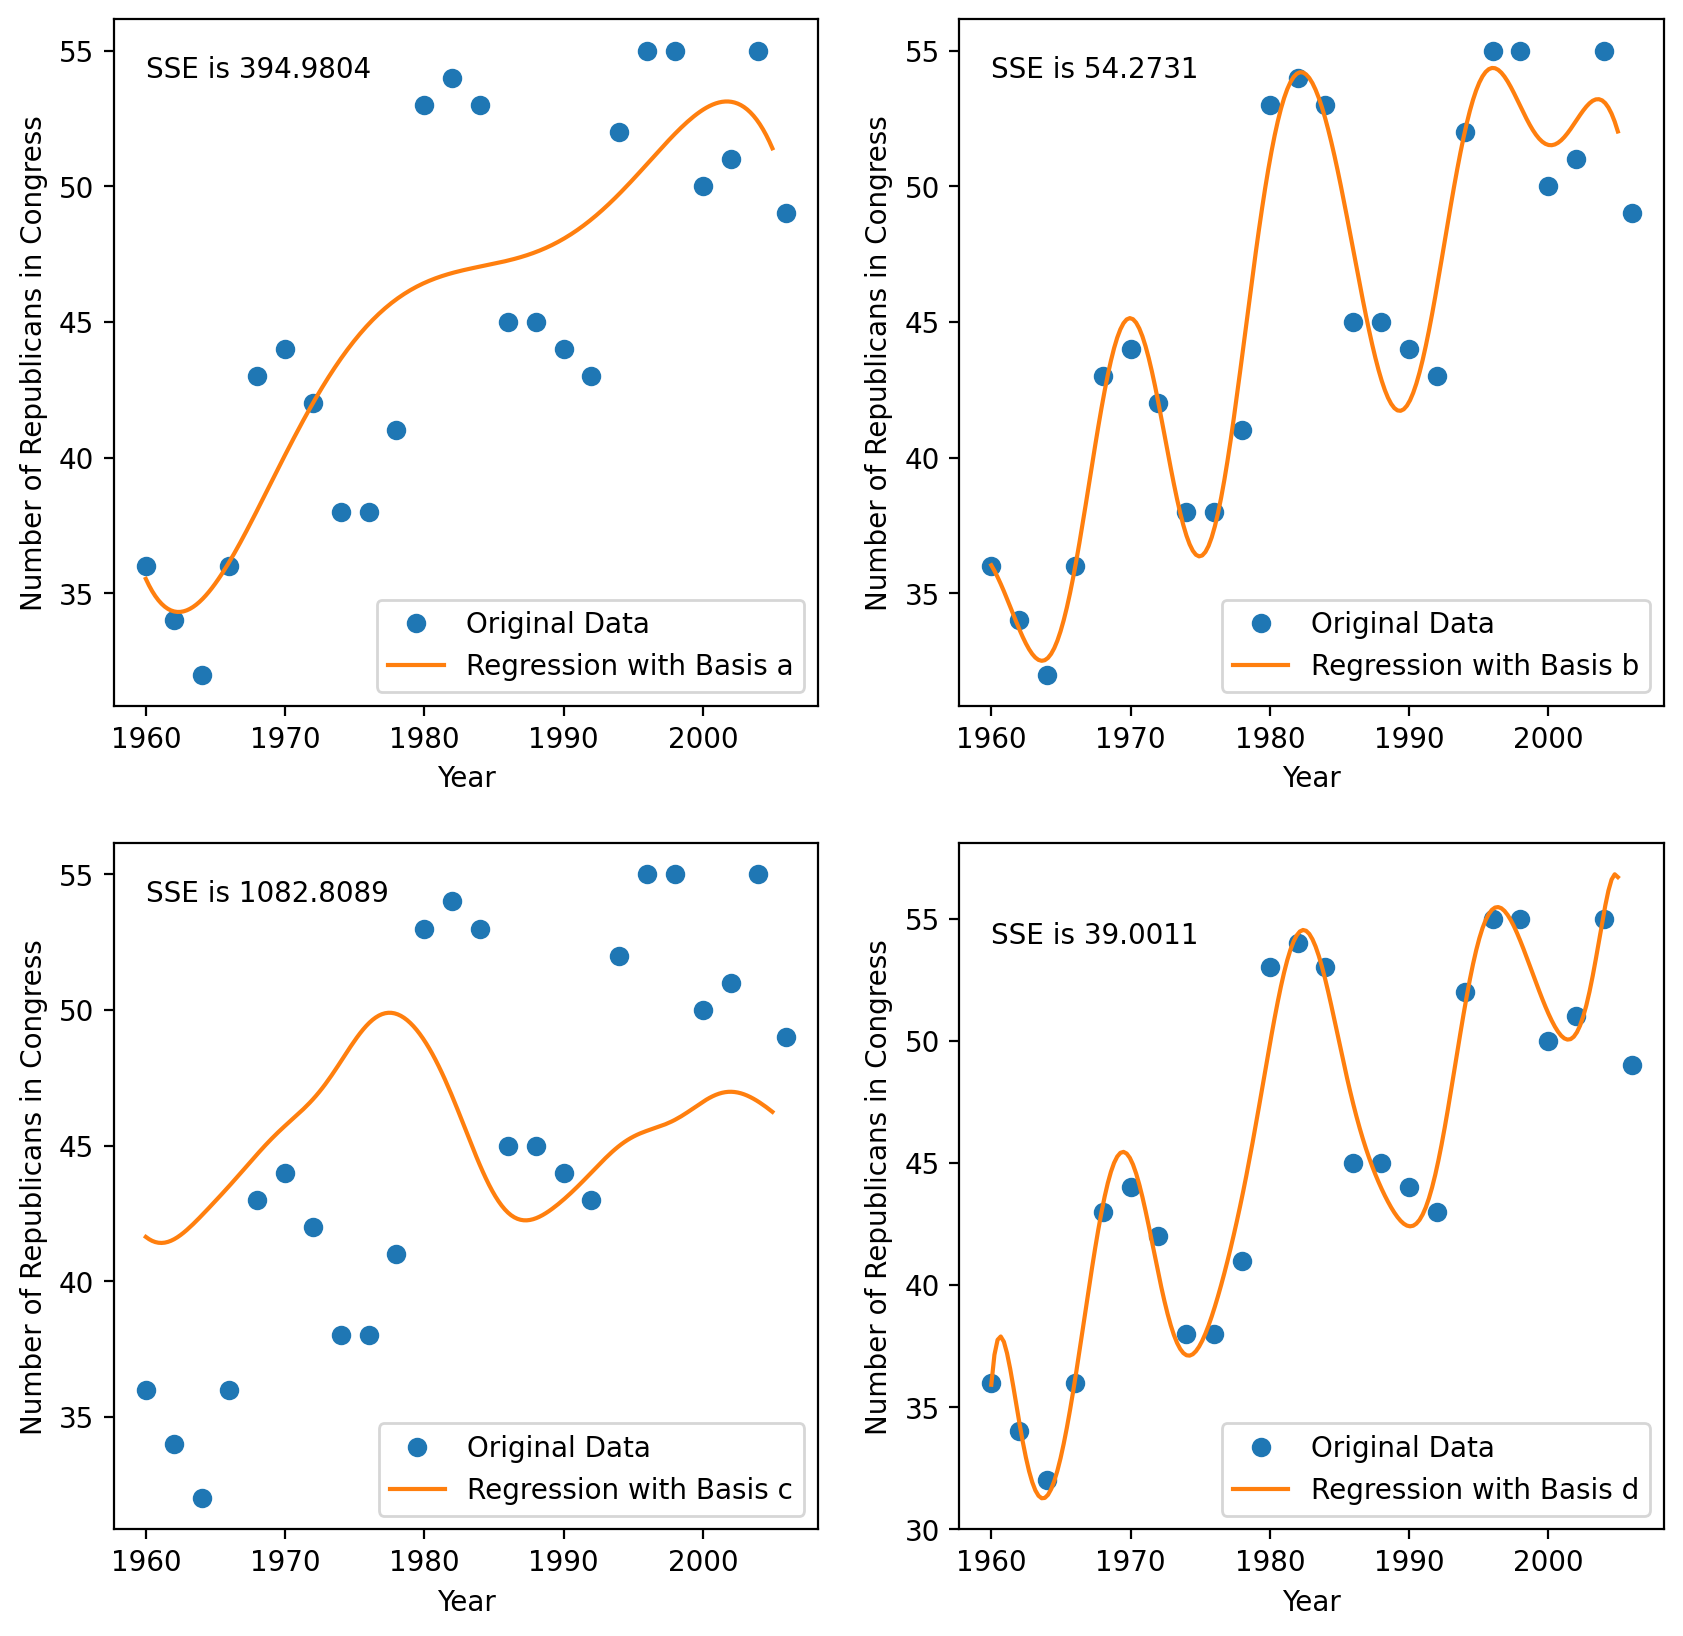

In [12]:
plt.figure(figsize=(10, 10), dpi=200)
p = ['a','b','c','d']
for j in range(4):
    # DO NOT CHANGE grid_years!!!!!
    grid_years = np.linspace(1960, 2005, 200)
    grid_X = np.vstack((np.ones(grid_years.shape), grid_years))
    grid_X_basis = make_basis(grid_X.T[:,1], part = p[j])
    
    #Use Training Data to Find Weights
    X_train = X[:,1]
    X_train_basis = make_basis(X_train, part = p[j])
    w = find_weights(X_train_basis, Y)
    
    #Use weights on the grid_X data
    grid_Yhat  = np.dot(grid_X_basis, w)
    
    # TODO: plot and report sum of squared error for each basis
    SSE = sum((Y - np.dot(X_train_basis, w))**2)
    
    # Plot the data and the regression line.
    plt.subplot(2, 2, j+1)
    plt.plot(X[:,1], Y, 'o', label = 'Original Data')
    plt.plot(grid_years, grid_Yhat, label = f'Regression with Basis {p[j]}')
    plt.text(1960,54,f'SSE is {SSE:.4f}')
    plt.xlabel("Year")
    plt.ylabel("Number of Republicans in Congress")
    plt.legend()

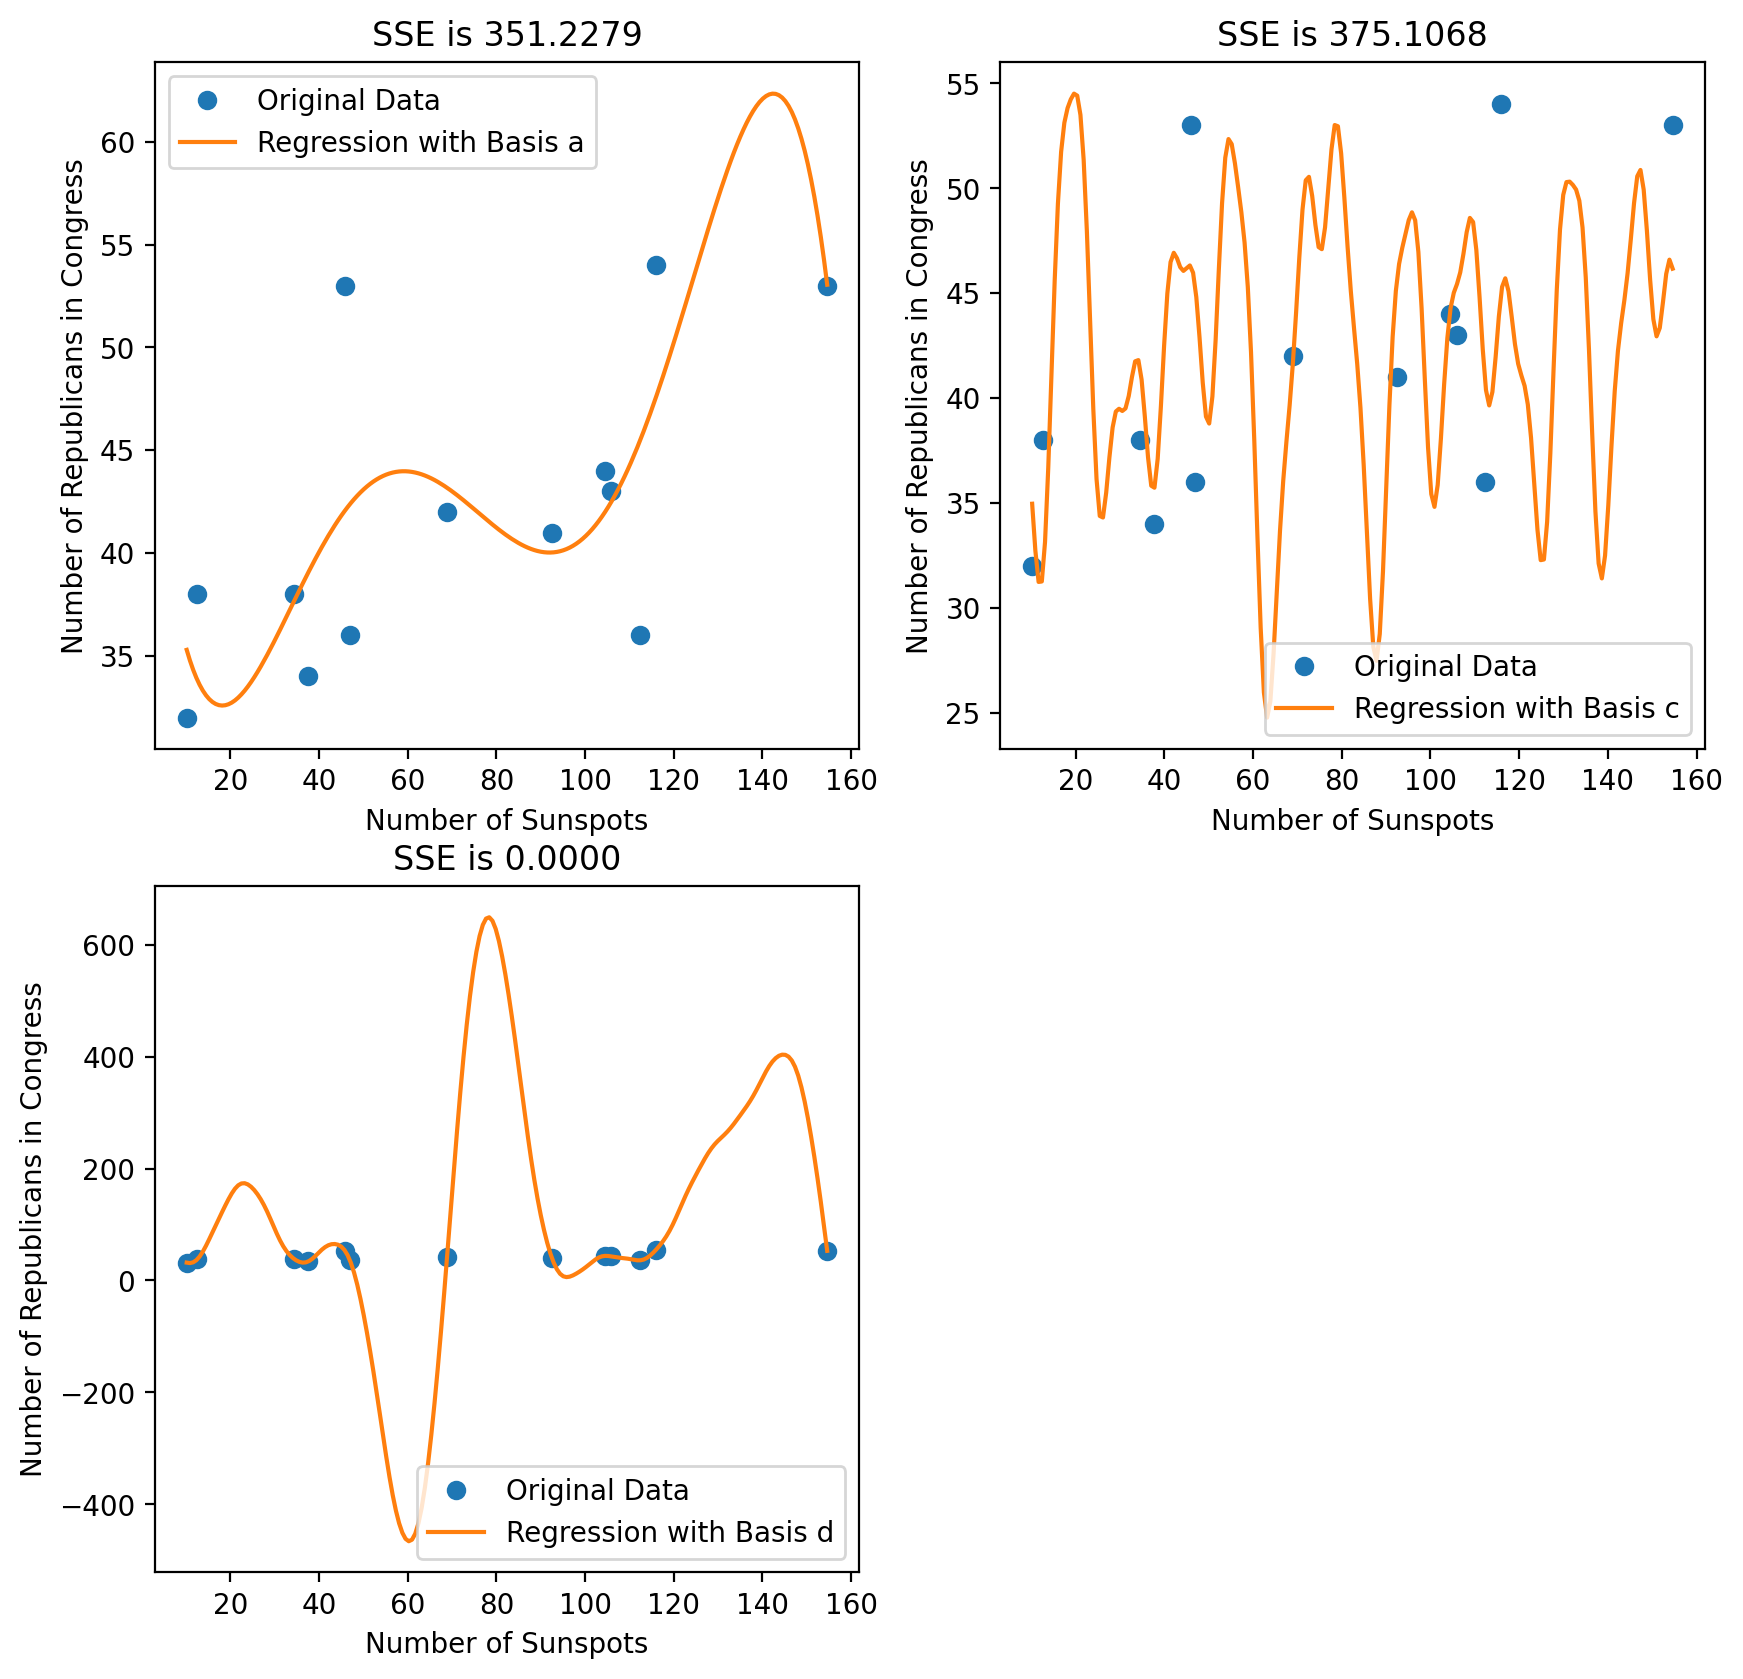

In [13]:
sunspot_counts_use = sunspot_counts[:13]
X = np.vstack((np.ones(sunspot_counts_use.shape), sunspot_counts_use)).T
Y = Y[:13]

plt.figure(figsize=(10, 10), dpi=200)
p = ['a','c','d']
for j in range(3):
    grid_sun = np.linspace(min(sunspot_counts_use), max(sunspot_counts_use), 200)
    grid_X = np.vstack((np.ones(grid_sun.shape), grid_sun))
    grid_X_basis = make_basis(grid_X.T[:,1], part = p[j], is_years=False)
    
    #Use Training Data to Find Weights
    X_train = X[:,1]
    X_train_basis = make_basis(X_train, part = p[j], is_years=False)
    w = find_weights(X_train_basis, Y)
    
    #Use weights on the grid_X data
    grid_Yhat  = np.dot(grid_X_basis, w)
    
    # TODO: plot and report sum of squared error for each basis
    SSE = sum((Y - np.dot(X_train_basis, w))**2)
    
    # Plot the data and the regression line.
    plt.subplot(2, 2, j+1)
    plt.plot(X[:,1], Y, 'o', label = 'Original Data')
    plt.plot(grid_sun, grid_Yhat, label = f'Regression with Basis {p[j]}')
    plt.title(f'SSE is {SSE:.4f}', ha = 'center')
    plt.xlabel("Number of Sunspots")
    plt.ylabel("Number of Republicans in Congress")
    plt.legend()